##PROYECTO DATA SCIENCE MÓDULO 2
##COMISIÓN 61175
##PROFESOR: FERNANDO CARABEDO
AUTOR: PABLO PIFFER

# **Efectos de la música en la Salud Mental y su Relación con los Géneros Musicales**

# Introducción:

En la era actual, marcada por un ritmo de vida acelerado y las crecientes demandas personales y profesionales, la salud mental se ha convertido en un tema de relevancia global. Problemas como la ansiedad, la depresión, el insomnio y los trastornos obsesivo-compulsivos (OCD) afectan a millones de personas. Como psicólogo especializado en salud mental, uno de los aspectos que más me interesa explorar es cómo los hábitos cotidianos, como la elección y frecuencia de escucha de ciertos géneros musicales, pueden influir en el bienestar emocional y psicológico de los individuos.

La música, desde tiempos inmemoriales, ha jugado un papel central en la regulación emocional. Hoy en día, con la proliferación de servicios de streaming y el acceso a una inmensa variedad de géneros musicales, las personas recurren a la música no solo como entretenimiento, sino también como una herramienta para manejar el estrés, las emociones y el ritmo acelerado de la vida moderna. Este estudio se propone examinar cómo la preferencia por ciertos géneros musicales —como el pop, el rock, la música clásica, entre otros— y la frecuencia con que estos géneros se escuchan, pueden estar relacionados con variables clave de salud mental.

Aunque la frecuencia cardíaca (BPM) es una de las variables fisiológicas observadas, este trabajo se enfoca en un análisis integral que considera tanto indicadores de bienestar mental como físico. Buscamos entender si la música que escuchamos puede mejorar o empeorar síntomas de ansiedad, depresión e insomnio, y si el hábito de explorar nuevos géneros podría tener un efecto protector sobre la salud emocional. Este estudio nos permitirá ver con mayor claridad cómo algo tan presente en nuestras vidas, como la música, puede impactar en el manejo de las patologías de época, que son cada vez más comunes en una sociedad en constante cambio.

#Link del dataset

El dataset se obtiene de la web Kaggle.com, del siguiente link:

https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

A continuación se explora el mismo:





In [1]:
#Se importan las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import f_oneway

#Se instancia el dataset "Music x mental health"
df = pd.read_csv("https://raw.githubusercontent.com/pablopiffer/ProyectoDS2/main/mxmh_survey_results.csv")

In [2]:
#Se da una primera mirada al dataset
df.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
#Se ve cada uno de los valores de cada variable
for col in df.columns[1:]:
  print(f'{col}: {df[col].unique()}')

Age: [18. 63. 61. 21. 19. nan 17. 16. 15. 14. 20. 26. 23. 37. 36. 24. 22. 42.
 25. 32. 29. 41. 31. 33. 30. 43. 28. 34. 13. 35. 27. 53. 49. 60. 38. 44.
 40. 64. 56. 59. 10. 12. 54. 57. 69. 72. 73. 39. 58. 67. 70. 55. 48. 71.
 74. 51. 65. 80. 50. 68. 46. 89.]
Primary streaming service: ['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]
Hours per day: [ 3.    1.5   4.    2.5   5.    1.    6.    8.    2.   12.   24.    0.5
  0.25  0.    7.   10.    9.    0.7   4.5  20.   16.   15.   14.   13.
  0.1  11.   18.  ]
While working: ['Yes' 'No' nan]
Instrumentalist: ['Yes' 'No' nan]
Composer: ['Yes' 'No' nan]
Fav genre: ['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']
Exploratory: ['Yes' 'No']
Foreign languages: ['Yes' 'No' nan]
BPM: [1.56000000e+02 1.19000000e+02 1.32000000e+02 8.40000000e+01
 1.07000000e+02 8.60000000e+01 6.60000000e+01 9

In [4]:
#Se ve los valores únicos por variable
df.nunique()

,0
Timestamp,735
Age,61
Primary streaming service,6
Hours per day,27
While working,2
Instrumentalist,2
Composer,2
Fav genre,16
Exploratory,2
Foreign languages,2


In [5]:
#Se sigue con la exploración del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

#Definición de variables



*   Age: Edad del encuestado, representada en años.
*   Primary streaming service: Principal plataforma de streaming musical utilizada, como Spotify, YouTube Music, entre otros.
*   Hours per day: Cantidad de horas diarias que el encuestado dedica a escuchar música.
*   While working: Indica si el encuestado escucha música mientras trabaja (Sí o No).
*   Instrumentalist: Indica si el encuestado toca un instrumento musical (Sí o No).
*   Composer: Indica si el encuestado compone música (Sí o No).
*   Fav genre: Género musical favorito del encuestado, como Pop, Rock, Jazz, etc.
*   Exploratory: Indica si el encuestado está abierto a explorar nuevos géneros musicales (Sí o No).
*   Foreign languages: Indica si el encuestado habla otros idiomas además del materno (Sí o No).
*   BPM: Beats per minute (pulsaciones por minuto), que mide la frecuencia cardíaca.
*   Frequency [Classical]: Frecuencia con la que el encuestado escucha música clásica (Nunca, Rara vez, A veces, Muy frecuentemente).
*   Frequency [Country]: Frecuencia con la que el encuestado escucha música country.
*   Frequency [EDM]: Frecuencia con la que el encuestado escucha música electrónica (EDM).
*   Frequency [Folk]: Frecuencia con la que el encuestado escucha música folk.
*   Frequency [Gospel]: Frecuencia con la que el encuestado escucha música gospel.
*   Frequency [Hip hop]: Frecuencia con la que el encuestado escucha hip hop.
*   Frequency [Jazz]: Frecuencia con la que el encuestado escucha jazz.
*   Frequency [K pop]: Frecuencia con la que el encuestado escucha K-pop.
*   Frequency [Latin]: Frecuencia con la que el encuestado escucha música latina.
*   Frequency [Lofi]: Frecuencia con la que el encuestado escucha música lo-fi.
*   Frequency [Metal]: Frecuencia con la que el encuestado escucha música metal.
*   Frequency [Pop]: Frecuencia con la que el encuestado escucha música pop.
*   Frequency [R&B]: Frecuencia con la que el encuestado escucha música R&B.
*   Frequency [Rap]: Frecuencia con la que el encuestado escucha rap.
*   Frequency [Rock]: Frecuencia con la que el encuestado escucha rock.
*   Frequency [Video game music]: Frecuencia con la que el encuestado escucha música de videojuegos.
*   Anxiety: Nivel de ansiedad reportado por el encuestado, en una escala de 0 a 10.
*   Depression: Nivel de depresión reportado por el encuestado, en una escala de 0 a 10.
*   Insomnia: Nivel de insomnio experimentado por el encuestado, en una escala de 0 a 10.
*   OCD: Nivel de síntomas de trastorno obsesivo-compulsivo reportado, en una escala de 0 a 10.
*   Music effects: Efectos percibidos de la música en la salud del encuestado (Ningún efecto, Mejora, Empeora).


No se menciona las variables Timestamp y Permissions, porque serán removidos del análisis. El motivo es simple: no son de interés para el presente trabajo contar con esas variables.

In [6]:
#Se elimina las variables Timestamp y Permissions
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

In [7]:
#Se cuenta los nulos
df.isnull().sum()

,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4
BPM,107


In [8]:
#Se dropea los nulos, excepto BPM
df.dropna(inplace=True, subset=[col for col in df.columns if col != 'BPM'])

In [9]:
df.isnull().sum()

,0
Age,0
Primary streaming service,0
Hours per day,0
While working,0
Instrumentalist,0
Composer,0
Fav genre,0
Exploratory,0
Foreign languages,0
BPM,102


In [10]:
# Se define un límite razonable para los valores de BPM
bpm_limite = 250

# Se reemplaza los valores atípicos (por encima de 250 BPM o valores erróneos) por NaN
df['BPM'] = df['BPM'].apply(lambda x: np.nan if x > bpm_limite else x)

In [11]:
# Se filtra las filas donde 'BPM' es nulo y agrupar por 'Fav genre'
df_agrupado = df[df['BPM'].isnull()].groupby('Fav genre').size().sort_values(ascending=False)

# Se muestra los resultados
print(df_agrupado)

Fav genre
Rock                35
Pop                 17
Classical           13
Metal               10
Video game music     8
R&B                  5
Country              4
Folk                 4
Gospel               2
Hip hop              2
Rap                  2
EDM                  1
Jazz                 1
dtype: int64


In [12]:
df=df.reset_index(drop=True)

In [13]:
#Se obtiene la media de BPM de cada fav genre, y se reemplaza los nulos de BPM con eso
mean_BPM_per_genre = df.groupby('Fav genre')['BPM'].transform('mean')
df['BPM'].fillna(mean_BPM_per_genre, inplace=True)

<ipython-input-13-6b25a54a2b38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPM'].fillna(mean_BPM_per_genre, inplace=True)


In [14]:
df['BPM'].describe()

,BPM
count,718.000000
mean,122.514442
std,31.695268
min,0.000000
25%,105.000000
50%,120.000000
75%,140.000000
max,220.000000


In [15]:
df.isnull().sum()

,0
Age,0
Primary streaming service,0
Hours per day,0
While working,0
Instrumentalist,0
Composer,0
Fav genre,0
Exploratory,0
Foreign languages,0
BPM,0


##CONTINUANDO CON EL ANALISIS EXPLORATORIO DE LOS DATOS

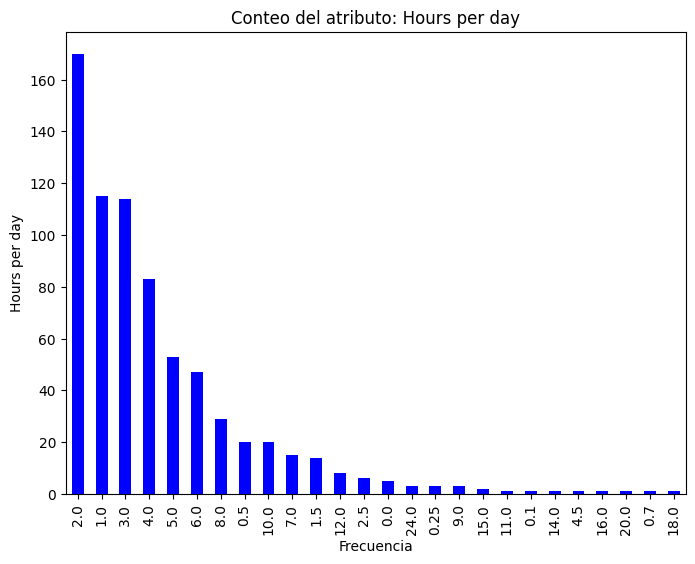

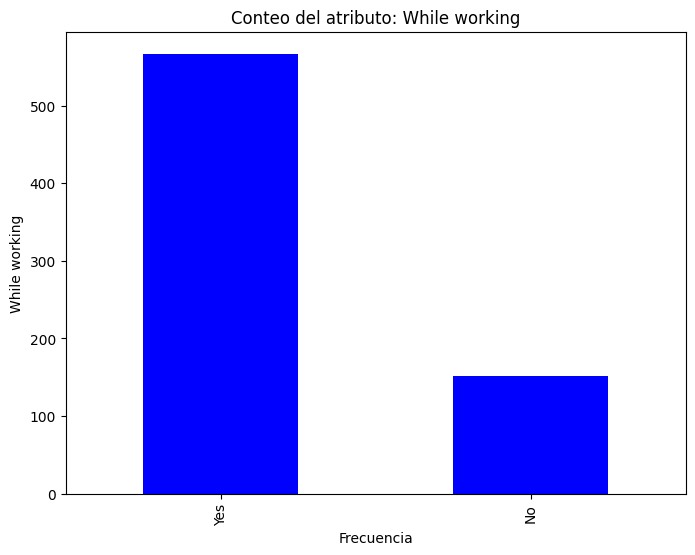

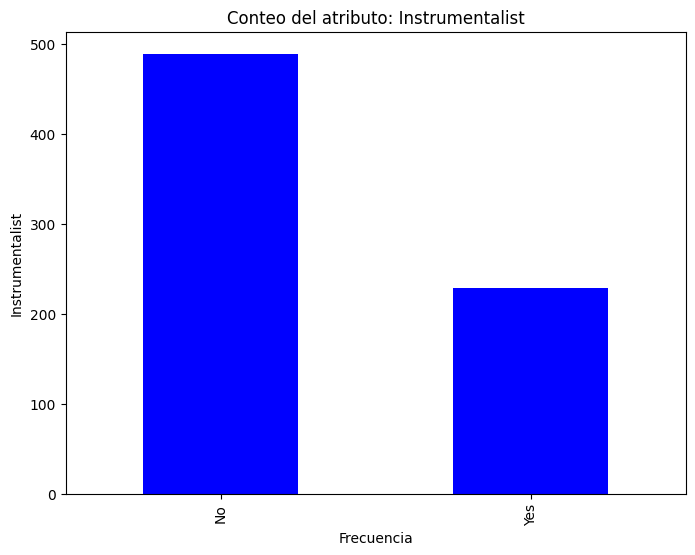

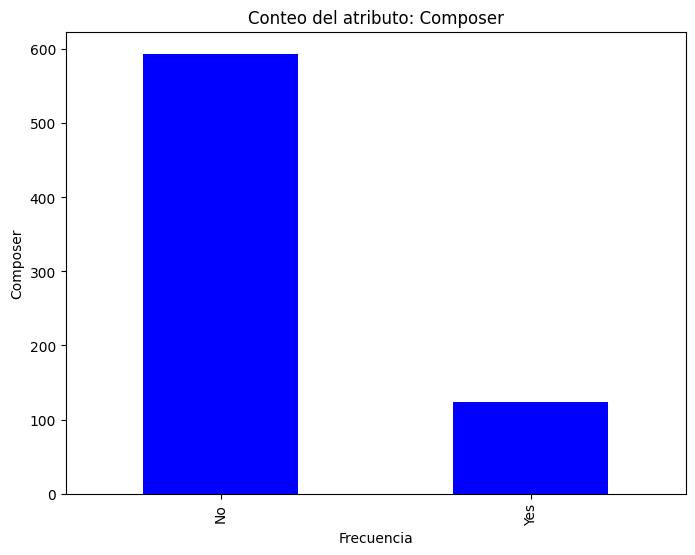

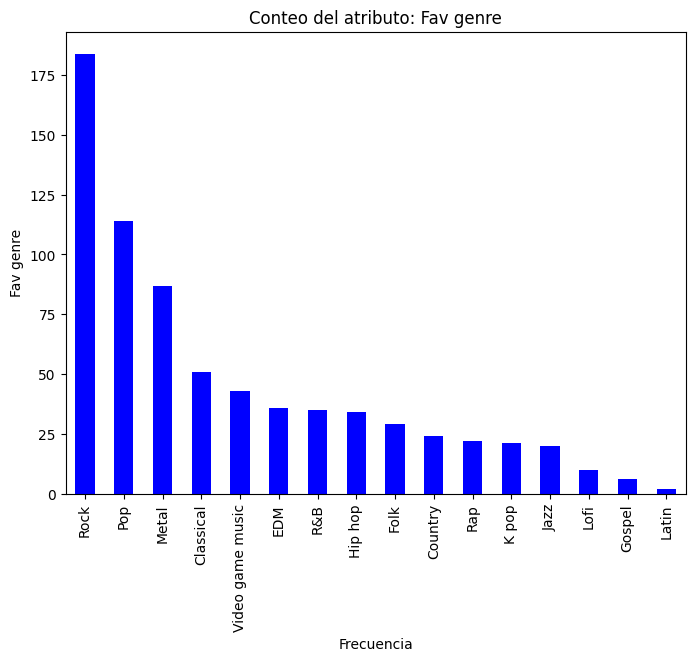

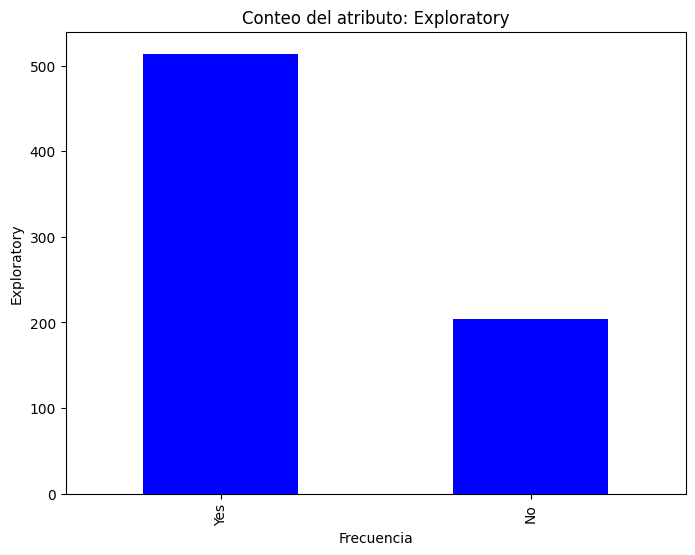

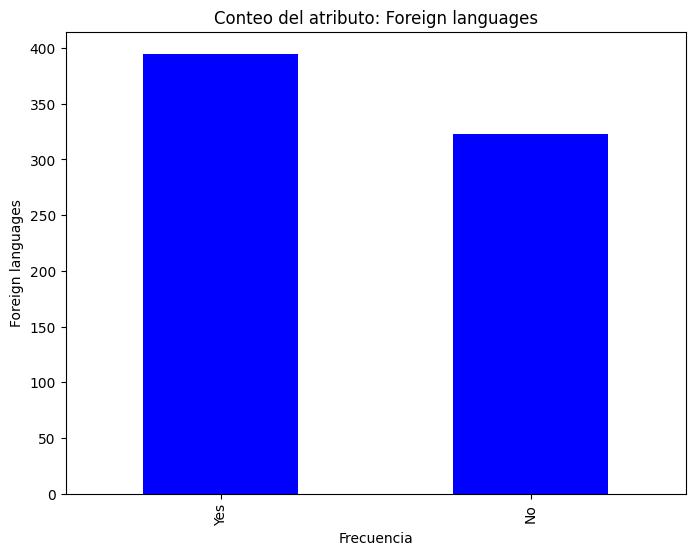

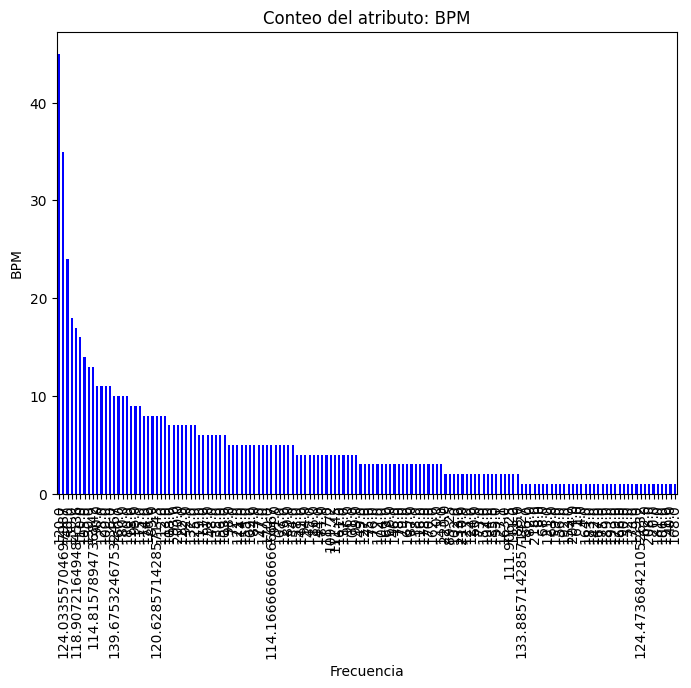

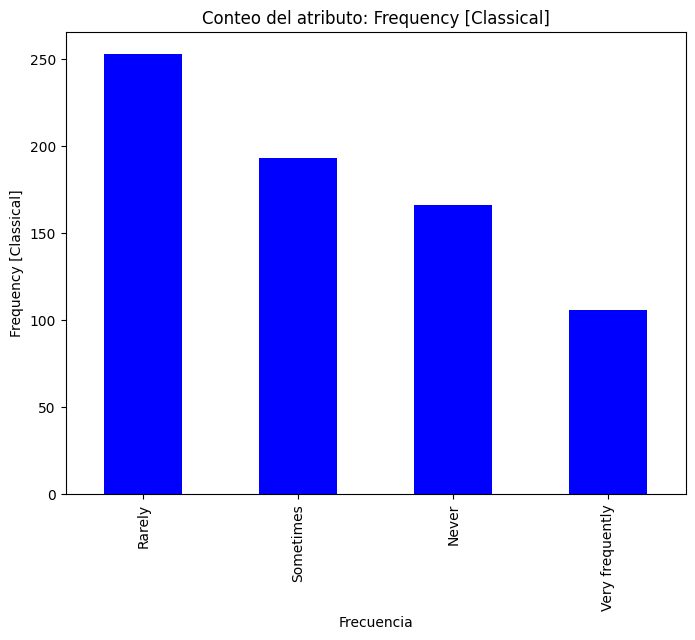

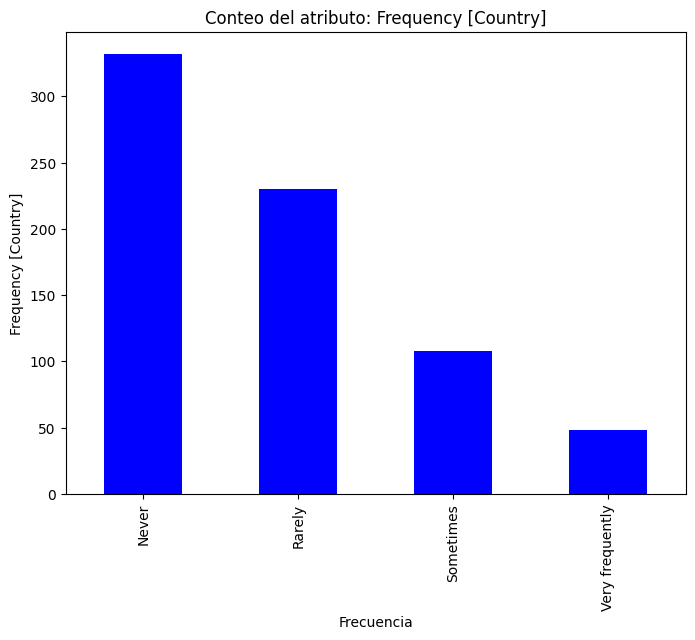

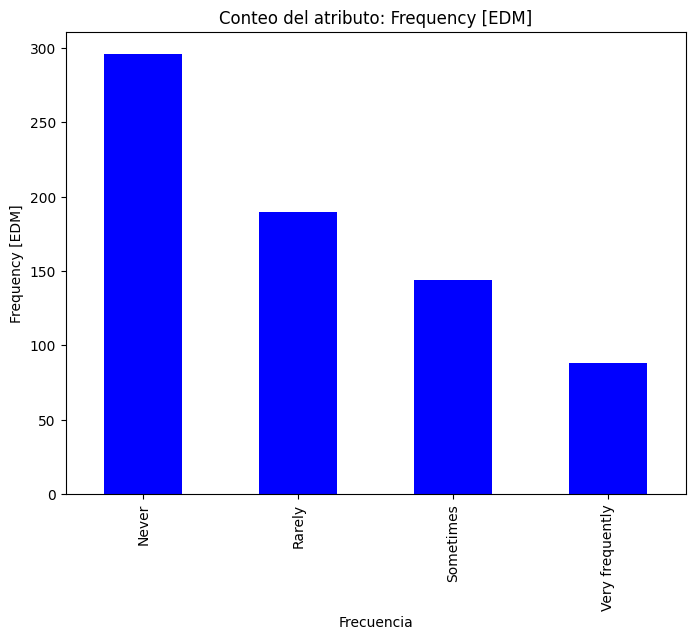

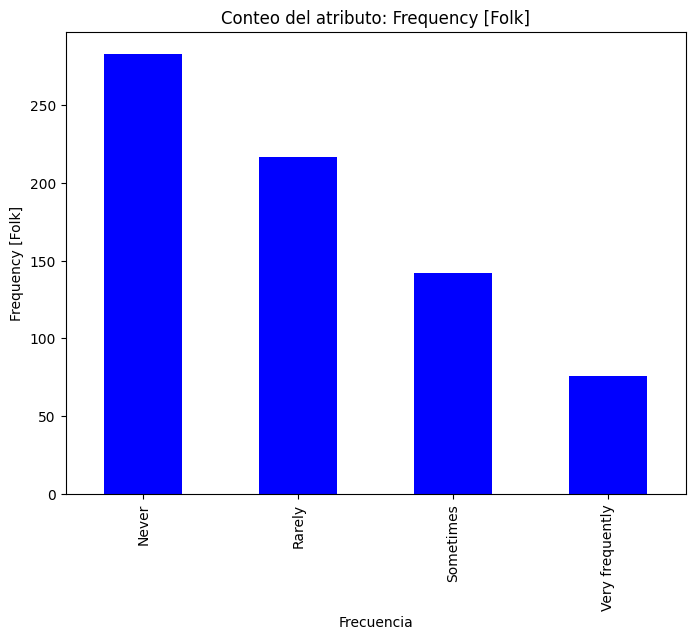

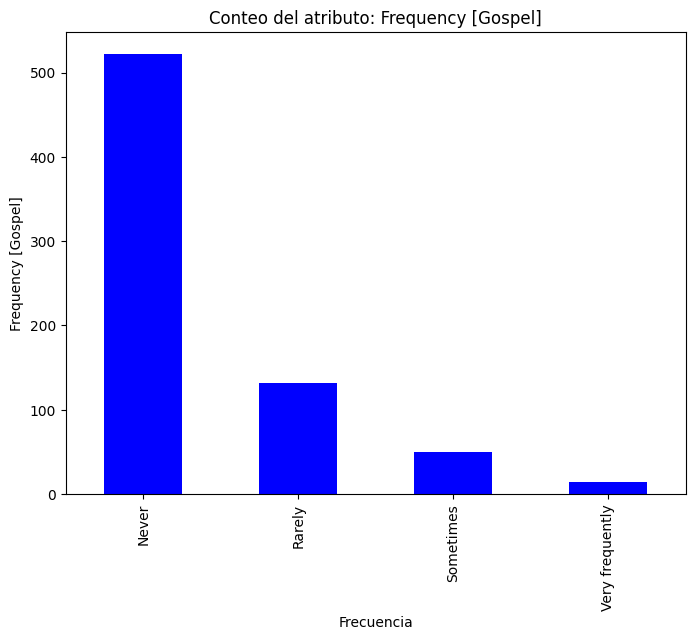

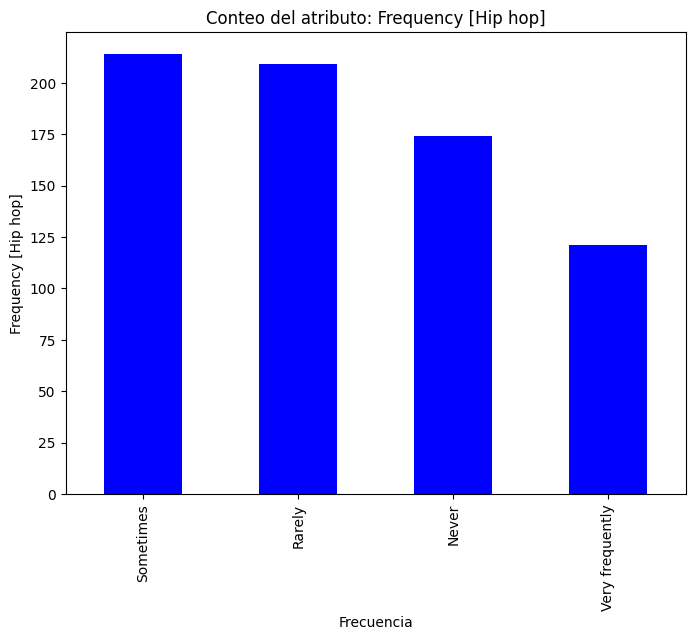

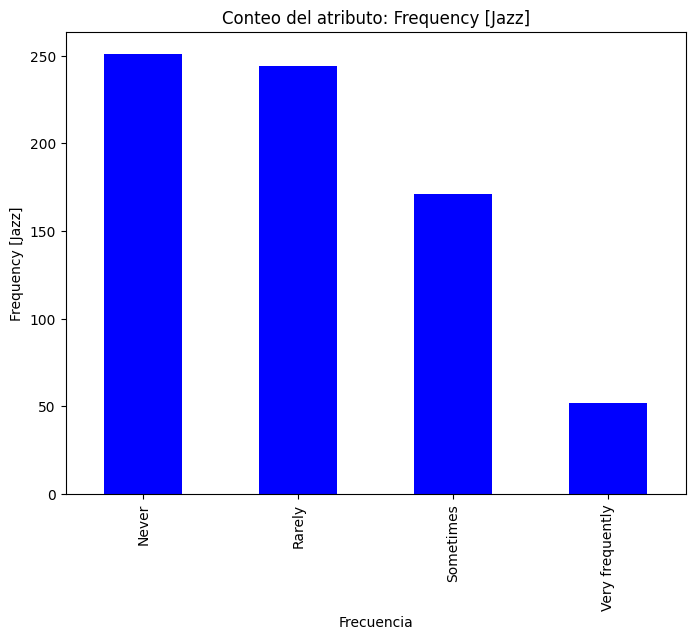

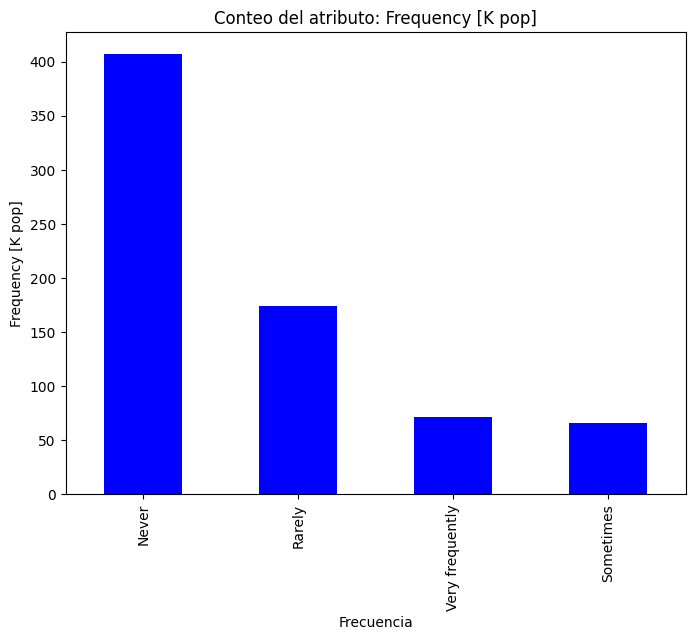

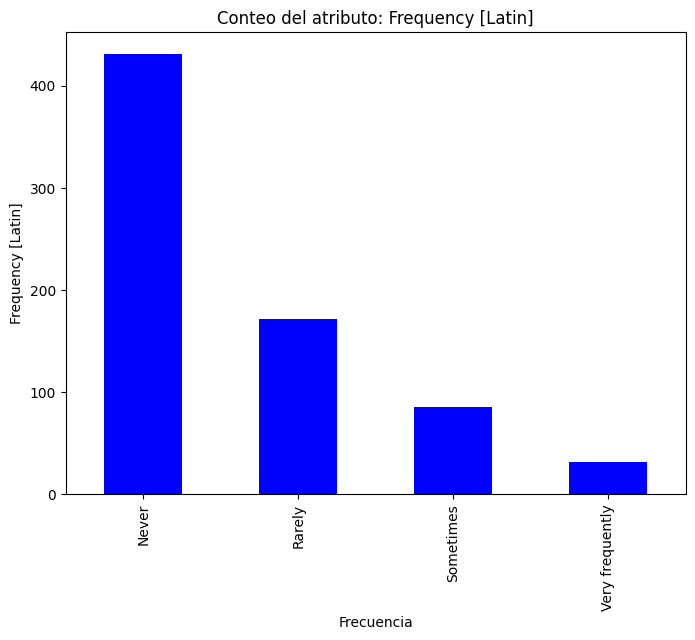

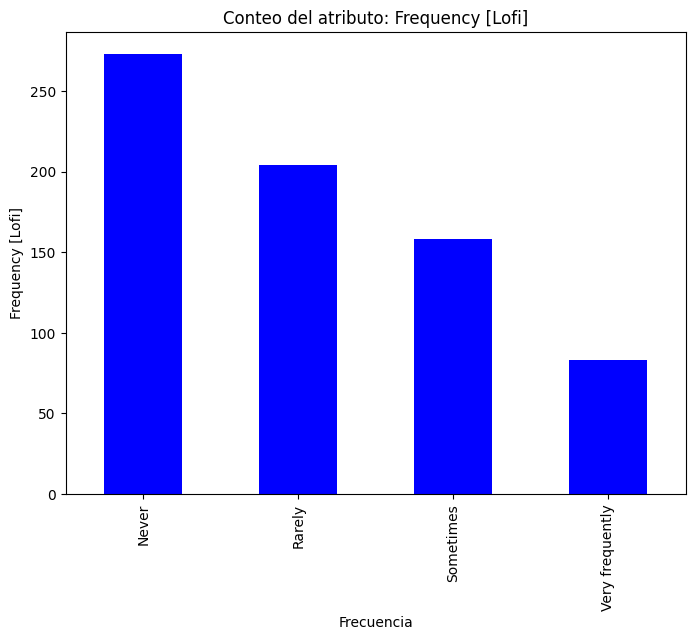

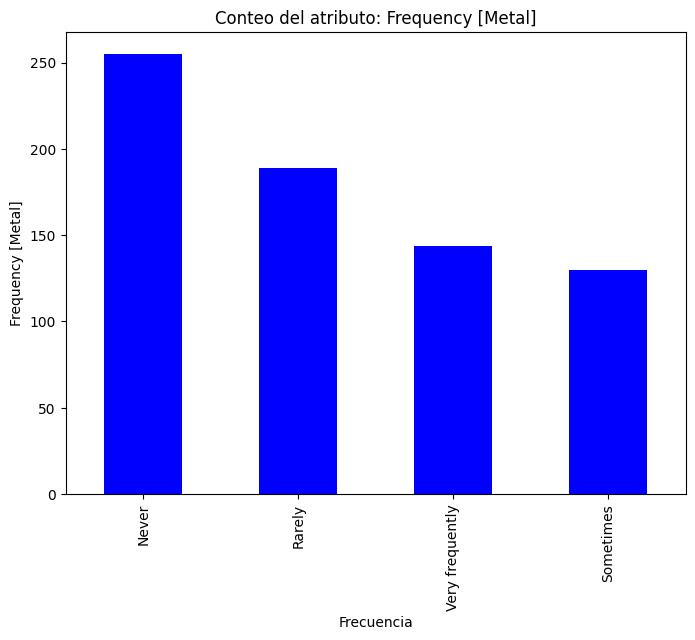

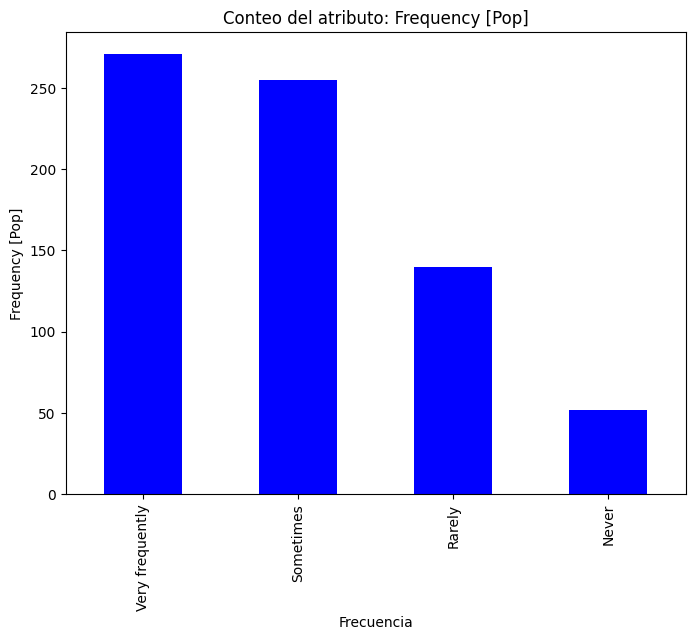

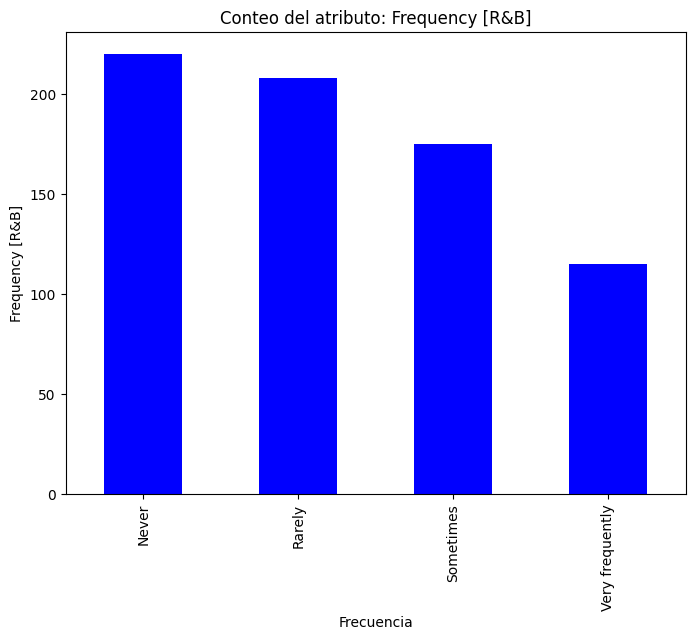

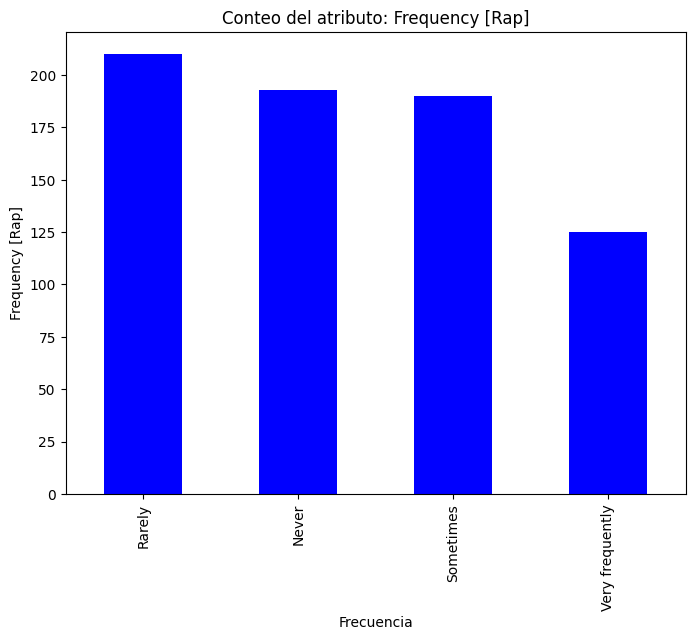

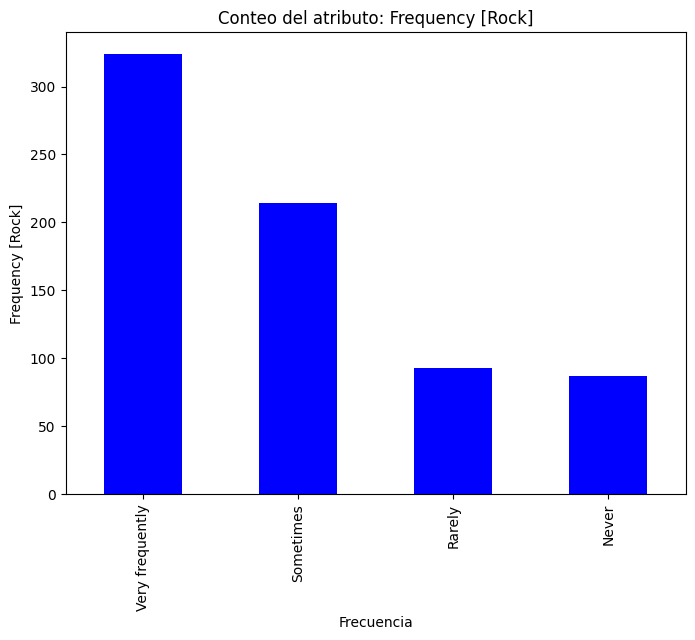

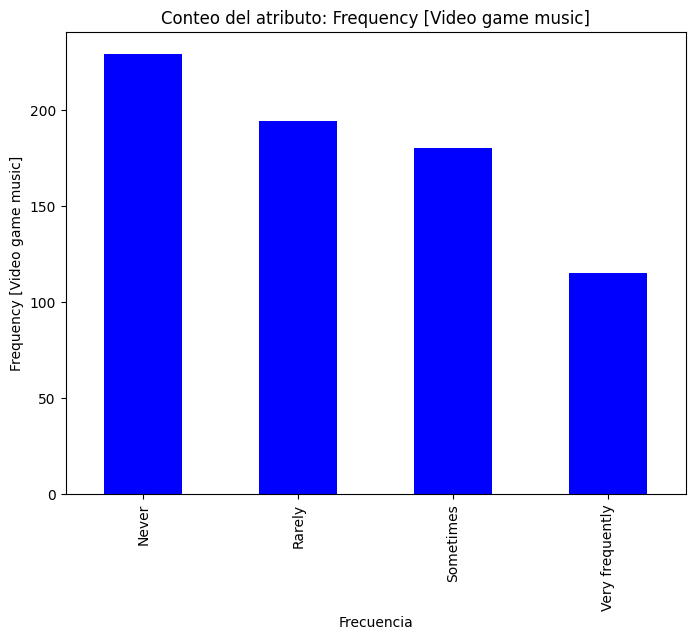

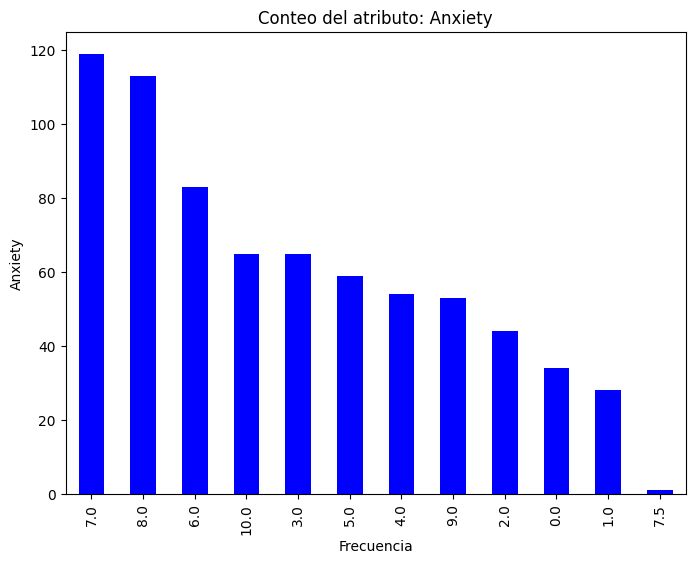

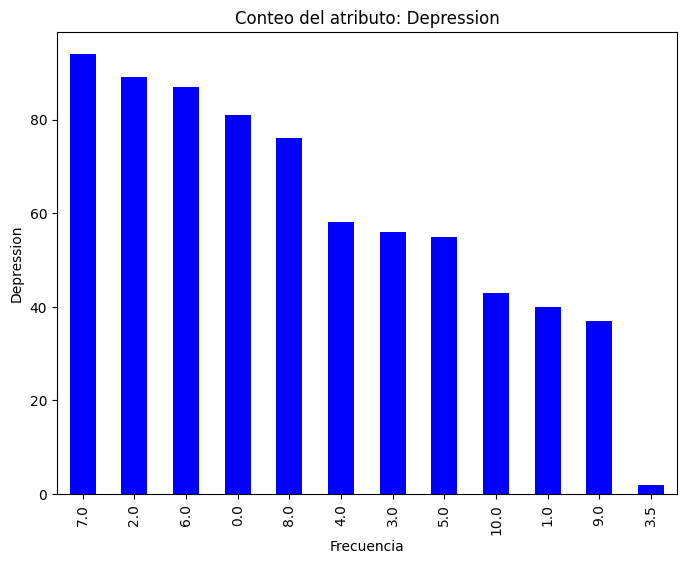

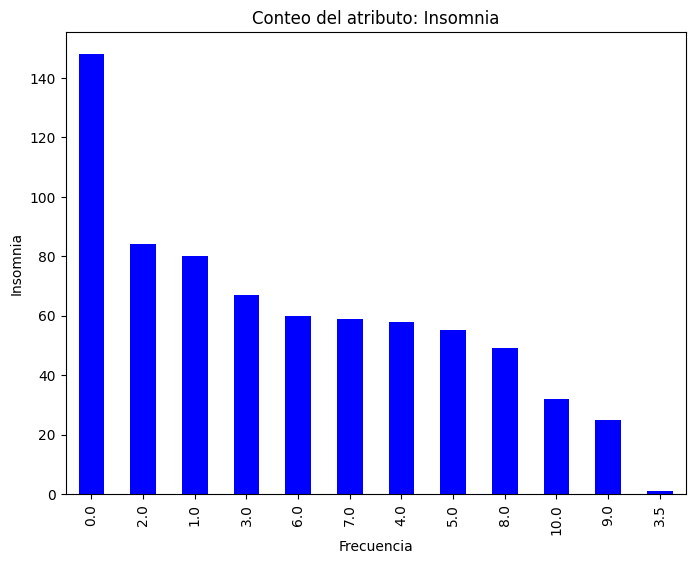

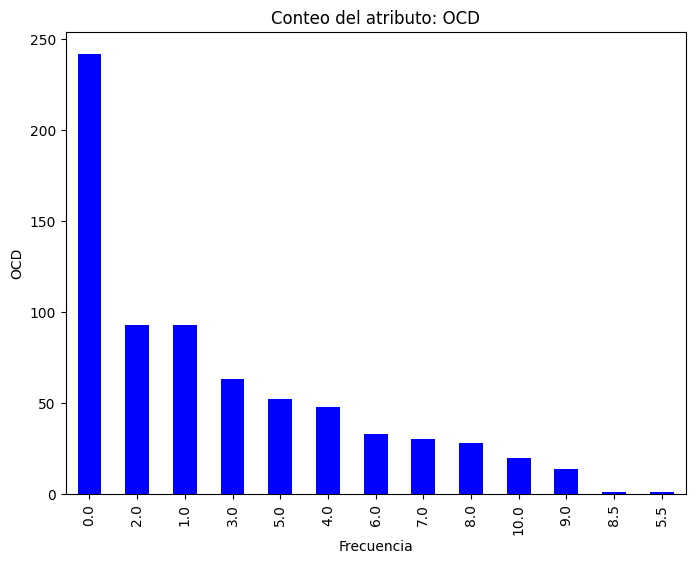

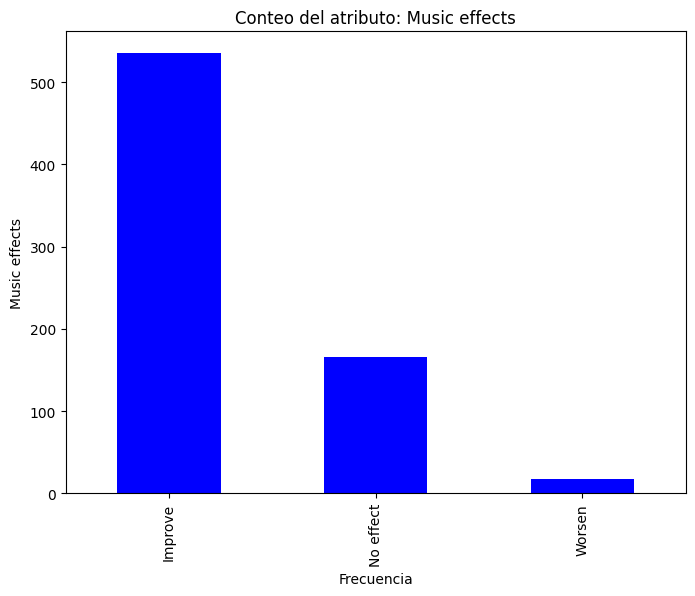

In [16]:
#Se itera con cada dimensión para ver su distribución y tener un primer vistazo gráfico de los datos
for column in df.columns[2:]:
    plt.figure(figsize=(8,6))
    df[column].value_counts().plot(kind='bar', color='blue')
    plt.title(f"Conteo del atributo: {column}")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)
    plt.show()

In [17]:
#Se itera a fines de generar gráficos para la ppt

# Se define cuántos gráficos por fila
ncols = 4
nrows = 1

# Se calcula cuántos archivos se necesitan
total_columns = len(df.columns[2:])
num_files = math.ceil(total_columns / ncols)

# Se itera y genera un archivo por cada conjunto de 4 gráficos
for file_idx in range(num_files):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4))
    axes = axes.flatten()

    start_idx = file_idx * ncols
    end_idx = min(start_idx + ncols, total_columns)

    # Se itera sobre las columnas y gráficos
    for i, column in enumerate(df.columns[2:][start_idx:end_idx]):
        df[column].value_counts().plot(kind='bar', color='blue', ax=axes[i])
        axes[i].set_title(f"Distribución del atributo: {column}")
        axes[i].set_xlabel("Frecuencia")
        axes[i].set_ylabel(column)

    # Se elimina gráficos vacíos si el número de columnas no es múltiplo de 4
    for j in range(i+1, ncols):
        fig.delaxes(axes[j])

    # Se ajusta el espacio entre los gráficos
    plt.tight_layout()

    # Se guarda la imagen en un archivo, numerando cada archivo
    plt.savefig(f"grid_plot_part_{file_idx+1}.png", format='png', dpi=300)

    # Se cierra la figura para evitar sobrecarga en la memoria
    plt.close(fig)

##HIPOTESIS A PLANTEAR

Pregunta 1: ¿Las personas que escuchan géneros musicales como Lofi, Jazz o Clásica de manera frecuente presentan niveles más bajos de ansiedad y depresión en comparación con quienes escuchan géneros como Metal o Rap?

    Hipótesis 1: Las personas que escuchan géneros musicales asociados con ritmos suaves y relajantes, como Lofi, Jazz o Clásica, muestren menores niveles de ansiedad y depresión. Estos géneros suelen tener un efecto calmante y podrían estar relacionados con mejores estrategias de manejo emocional.
  
Pregunta 2: ¿Escuchar música durante más horas al día está relacionado con mayores niveles de insomnio, independientemente del género musical preferido?

    Hipótesis 2: Las personas que escuchan música por muchas horas al día presenten mayores niveles de insomnio.

Pregunta 3: ¿Los géneros musicales que tienen un ritmo más acelerado (representado por un BPM más alto) están asociados con mayores niveles de ansiedad o estrés?

    Hipótesis 3: Las personas qu escuchan los géneros musicales con un ritmo más rápido, como EDM, Metal o Rap, que suelen tener BPMs más altos, están asociadas con mayores niveles de ansiedad o estrés.

Pregunta 4: ¿Las personas que muestran mayor diversidad en sus preferencias musicales (escuchando varios géneros con frecuencia) tienen menores niveles de ansiedad y depresión en comparación con quienes se limitan a pocos géneros?

    Hipótesis 4: Las personas que muestran una mayor diversidad musical se adaptan mejor a distintas situaciones emocionales.





#Hipótesis 1: La frecuencia de escucha de música suave está asociada a un menor nivel de ansiedad.

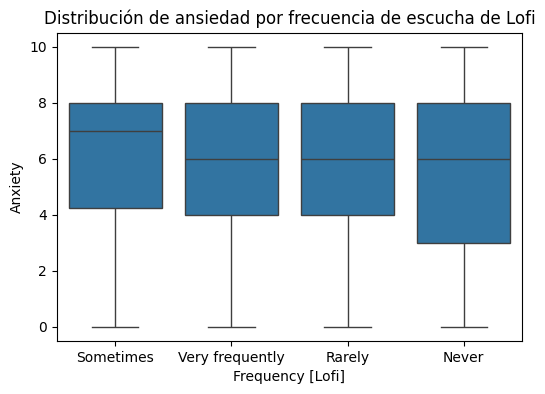

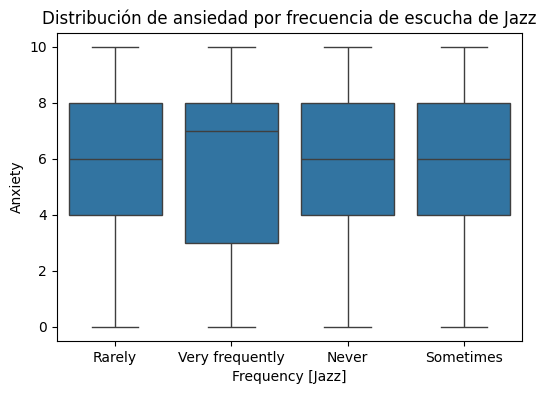

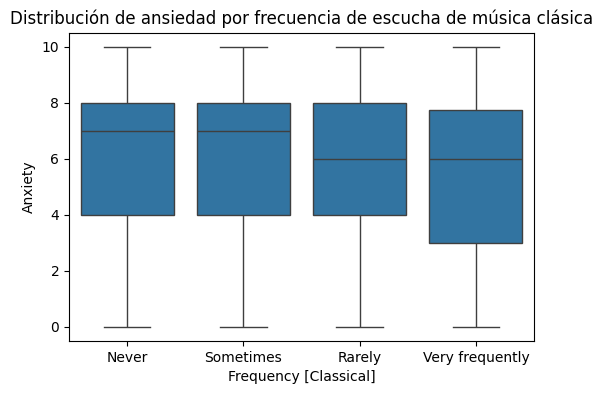

In [18]:
# Gráfico de Lofi
plt.figure(figsize=(6,4))
sns.boxplot(x='Frequency [Lofi]', y='Anxiety', data=df)
plt.title('Distribución de ansiedad por frecuencia de escucha de Lofi')
plt.show()

# Gráfico de Jazz
plt.figure(figsize=(6,4))
sns.boxplot(x='Frequency [Jazz]', y='Anxiety', data=df)
plt.title('Distribución de ansiedad por frecuencia de escucha de Jazz')
plt.show()

# Gráfico de Classical
plt.figure(figsize=(6,4))
sns.boxplot(x='Frequency [Classical]', y='Anxiety', data=df)
plt.title('Distribución de ansiedad por frecuencia de escucha de música clásica')
plt.show()

In [19]:
df_clean = df.copy()

# Primero, se categoriza los niveles de ansiedad en tres grupos: Bajo, Moderado, Alto
df_clean['Anxiety_cat'] = pd.cut(df_clean['Anxiety'], bins=[0, 3, 7, 10], labels=['Bajo', 'Moderado', 'Alto'], right=False)

# Se verifica si hay filas en cada categoría
print("Distribución de la categorización de Anxiety:")
print(df_clean['Anxiety_cat'].value_counts())

# Se expone una muestra de los datos categorizados
print(df_clean[['Anxiety', 'Anxiety_cat']].head())

Distribución de la categorización de Anxiety:
Anxiety_cat
Alto        286
Moderado    261
Bajo        106
Name: count, dtype: int64
   Anxiety Anxiety_cat
0      7.0        Alto
1      9.0        Alto
2      7.0        Alto
3      8.0        Alto
4      4.0    Moderado


In [20]:
# Se genera la tabla de contingencia para Jazz
contingency_table_jazz = pd.crosstab(df_clean['Anxiety_cat'], df['Frequency [Jazz]'])
contingency_table_lofi = pd.crosstab(df_clean['Anxiety_cat'], df['Frequency [Lofi]'])
contingency_table_classical = pd.crosstab(df_clean['Anxiety_cat'], df['Frequency [Classical]'])

# Mostrar la tabla de contingencia
print(contingency_table_jazz)
print()
print(contingency_table_lofi)
print()
print(contingency_table_classical)

Frequency [Jazz]  Never  Rarely  Sometimes  Very frequently
Anxiety_cat                                                
Bajo                 37      38         22                9
Moderado             89      91         66               15
Alto                100      96         65               25

Frequency [Lofi]  Never  Rarely  Sometimes  Very frequently
Anxiety_cat                                                
Bajo                 49      34         12               11
Moderado            102      77         50               32
Alto                 98      72         82               34

Frequency [Classical]  Never  Rarely  Sometimes  Very frequently
Anxiety_cat                                                     
Bajo                      24      39         25               18
Moderado                  58      93         68               42
Alto                      66      97         83               40


In [21]:
# Se realiza la prueba Chi-cuadrado de Jazz
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table_jazz)

# Resultados de la prueba
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

Estadístico Chi-cuadrado: 2.7337358270568926
Valor p: 0.8414465296599529
Grados de libertad: 6
Frecuencias esperadas:
[[36.68606432 36.5237366  24.83614089  7.95405819]
 [90.33078101 89.93108729 61.15313936 19.58499234]
 [98.98315467 98.54517611 67.01071975 21.46094946]]


In [22]:
# Se realiza la prueba Chi-cuadrado de Lofi
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table_lofi)

# Resultados de la prueba
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

Estadístico Chi-cuadrado: 17.0974739811733
Valor p: 0.00893161027175184
Grados de libertad: 6
Frecuencias esperadas:
[[ 40.41960184  29.70597243  23.37519142  12.4992343 ]
 [ 99.5237366   73.143951    57.55589587  30.77641654]
 [109.05666156  80.15007657  63.06891271  33.72434916]]


In [23]:
# Se realiza la prueba Chi-cuadrado de Classical
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table_classical)

# Resultados de la prueba
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

Estadístico Chi-cuadrado: 1.8689516027335735
Valor p: 0.931347766772805
Grados de libertad: 6
Frecuencias esperadas:
[[ 24.0245023   37.17304747  28.56967841  16.23277182]
 [ 59.15467075  91.52986217  70.34609495  39.96937213]
 [ 64.82082695 100.29709035  77.08422665  43.79785605]]


Tanto el jazz como la música clásica no mostraron una relación significativa entre su frecuencia y los niveles de ansiedad autopercibidos. Pero en el caso de lo-fi, el valor p indica una relación significativa entre la frecuencia de escucha y los niveles de ansiedad. Esto sugiere que las personas que escuchan más música lo-fi tienden a tener diferentes niveles de ansiedad en comparación con quienes la escuchan menos.

#Hipótesis 2: Las personas que escuchan música por muchas horas al día presentan mayores niveles de insomnio.

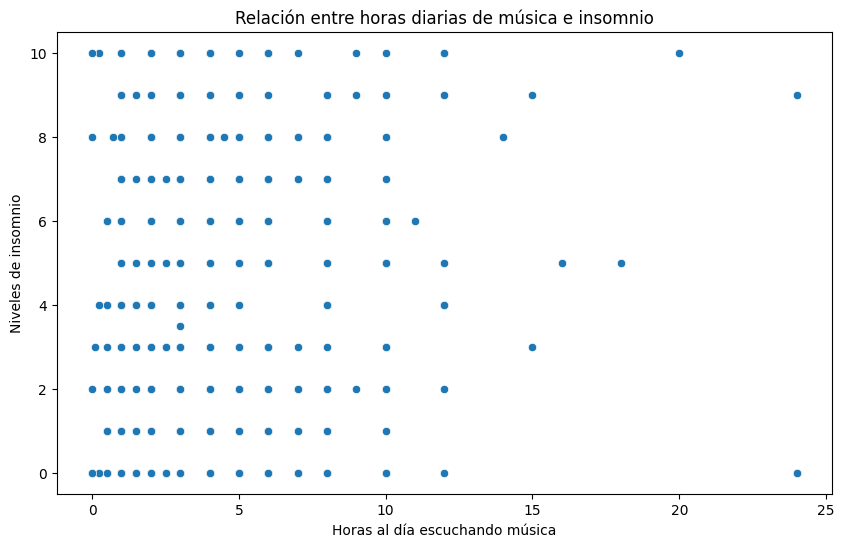

In [24]:
# Se realiza el gráfico de dispersión: Hours per day vs Insomnia
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours per day', y='Insomnia', data=df)
plt.title('Relación entre horas diarias de música e insomnio')
plt.xlabel('Horas al día escuchando música')
plt.ylabel('Niveles de insomnio')
plt.show()

In [25]:
# Se calcula la correlación de Pearson
corr, p_value = pearsonr(df['Hours per day'], df['Insomnia'])

# Se muestra los resultados
print(f"Correlación de Pearson entre Hours per day e Insomnia: {corr}, valor p: {p_value}")

Correlación de Pearson entre Hours per day e Insomnia: 0.13549301536320313, valor p: 0.00027149282837001806


La correlación positiva de 0.1355 indica una relación débil  entre la cantidad de horas que una persona escucha música al día y los niveles de insomnio. Un valor p menor a 0.05 sugiere que la correlación observada es estadísticamente significativa, lo que implica que existe una relación que no es atribuible al azar. Esta hipótesis proporciona evidencia inicial para explorar más a fondo la influencia del tiempo dedicado a escuchar música sobre la calidad del sueño, sugiriendo que podría haber un impacto en los niveles de insomnio. Se recomienda un análisis más profundo que considere otros factores.

#Hipótesis 3: Las personas qu escuchan los géneros musicales con un ritmo más rápido, como EDM, Metal o Rap, que suelen tener BPMs más altos, están asociados con mayores niveles de ansiedad o estrés.


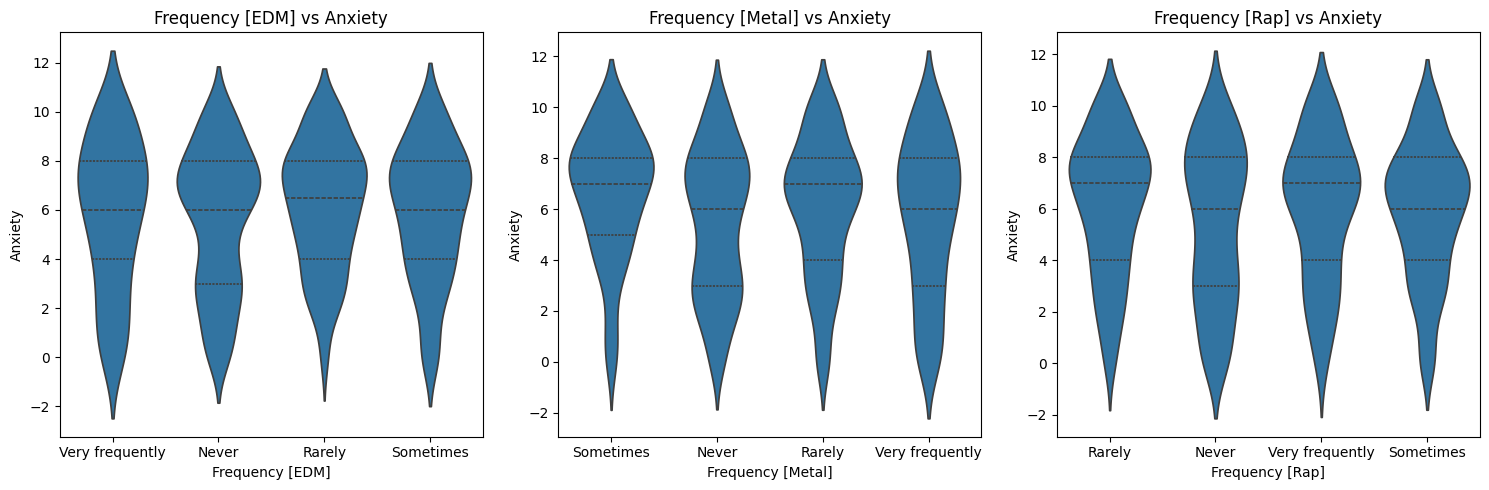

In [26]:
genres = ['Frequency [EDM]', 'Frequency [Metal]', 'Frequency [Rap]']

plt.figure(figsize=(15, 5))
for i, genre in enumerate(genres):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x=df[genre], y=df['Anxiety'], inner="quartile")
    plt.title(f'{genre} vs Anxiety')
    plt.xlabel(f'{genre}')
    plt.ylabel('Anxiety')

plt.tight_layout()
plt.show()

In [27]:
# Se crea la tabla de contingencia para EDM
contingency_edm = pd.crosstab(df['Frequency [EDM]'], df_clean['Anxiety_cat'])
print("Tabla de contingencia para Frequency [EDM]:")
print(contingency_edm)

# Se crea la tabla de contingencia para Metal
contingency_metal = pd.crosstab(df['Frequency [Metal]'], df_clean['Anxiety_cat'])
print("\nTabla de contingencia para Frequency [Metal]:")
print(contingency_metal)

# Se crea la tabla de contingencia para Rap
contingency_rap = pd.crosstab(df['Frequency [Rap]'], df_clean['Anxiety_cat'])
print("\nTabla de contingencia para Frequency [Rap]:")
print(contingency_rap)

Tabla de contingencia para Frequency [EDM]:
Anxiety_cat      Bajo  Moderado  Alto
Frequency [EDM]                      
Never              54        99   121
Rarely             18        77    76
Sometimes          17        57    58
Very frequently    17        28    31

Tabla de contingencia para Frequency [Metal]:
Anxiety_cat        Bajo  Moderado  Alto
Frequency [Metal]                      
Never                48        97    92
Rarely               22        70    78
Sometimes            10        43    63
Very frequently      26        51    53

Tabla de contingencia para Frequency [Rap]:
Anxiety_cat      Bajo  Moderado  Alto
Frequency [Rap]                      
Never              41        66    71
Rarely             26        73    90
Sometimes          21        79    75
Very frequently    18        43    50


In [28]:
# Chi-cuadrado para EDM
chi2_edm, p_edm, dof_edm, expected_edm = chi2_contingency(contingency_edm)
print(f"\nChi-cuadrado para Frequency [EDM]: {chi2_edm}, valor p: {p_edm}, grados de libertad: {dof_edm}")
print("Frecuencias esperadas:\n", expected_edm)

# Chi-cuadrado para Metal
chi2_metal, p_metal, dof_metal, expected_metal = chi2_contingency(contingency_metal)
print(f"\nChi-cuadrado para Frequency [Metal]: {chi2_metal}, valor p: {p_metal}, grados de libertad: {dof_metal}")
print("Frecuencias esperadas:\n", expected_metal)

# Chi-cuadrado para Rap
chi2_rap, p_rap, dof_rap, expected_rap = chi2_contingency(contingency_rap)
print(f"\nChi-cuadrado para Frequency [Rap]: {chi2_rap}, valor p: {p_rap}, grados de libertad: {dof_rap}")
print("Frecuencias esperadas:\n", expected_rap)


Chi-cuadrado para Frequency [EDM]: 10.960336129773163, valor p: 0.08961005486407896, grados de libertad: 6
Frecuencias esperadas:
 [[ 44.47779479 109.51607963 120.00612557]
 [ 27.75803982  68.34762634  74.89433384]
 [ 21.42725881  52.75957121  57.81316998]
 [ 12.33690658  30.37672282  33.2863706 ]]

Chi-cuadrado para Frequency [Metal]: 13.859690667523537, valor p: 0.03124337625090899, grados de libertad: 6
Frecuencias esperadas:
 [[ 38.47166922  94.72741194 103.80091884]
 [ 27.5957121   67.94793262  74.45635528]
 [ 18.83001531  46.36447167  50.80551302]
 [ 21.10260337  51.96018377  56.93721286]]

Chi-cuadrado para Frequency [Rap]: 10.715111175474528, valor p: 0.09759053065280926, grados de libertad: 6
Frecuencias esperadas:
 [[28.89433384 71.14548239 77.96018377]
 [30.67993874 75.54211332 82.77794793]
 [28.40735069 69.94640123 76.64624809]
 [18.01837672 44.36600306 48.61562021]]


En general, los resultados indican que existe una posible asociación entre la frecuencia de escucha de ciertos géneros musicales y los niveles de ansiedad. En particular, la música Metal muestra una relación significativa, mientras que EDM y Rap presentan resultados marginalmente significativos. Se sugiere realizar un análisis más profundo que considere factores adicionales, como la naturaleza de la música y el contexto en el que se escucha, para comprender mejor estas relaciones.

#Hipótesis 4: Las personas que muestran una mayor diversidad musical se adaptan mejor a distintas situaciones emocionales.

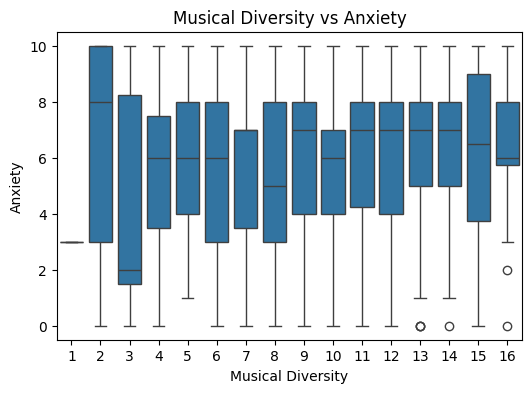

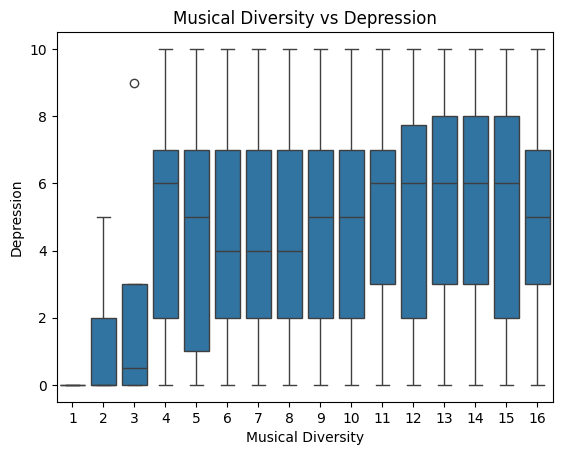

In [29]:
# Se define las columnas de frecuencia para los géneros musicales
frequency_columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
                     'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
                     'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                     'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Se crea una nueva columna que cuente cuántos géneros una persona escucha con frecuencia (excluyendo 'Never')
df['Musical Diversity'] = df[frequency_columns].apply(lambda row: sum(row != 'Never'), axis=1)


# Boxplot para ansiedad
plt.figure(figsize=(6,4))
sns.boxplot(x='Musical Diversity', y='Anxiety', data=df)
plt.title('Musical Diversity vs Anxiety')
plt.xlabel('Musical Diversity')
plt.ylabel('Anxiety')
plt.show()

# Boxplot para depresión
sns.boxplot(x='Musical Diversity', y='Depression', data=df)
plt.title('Musical Diversity vs Depression')
plt.xlabel('Musical Diversity')
plt.ylabel('Depression')
plt.show()

In [30]:
# Se categoriza los niveles de depresión en tres grupos: Bajo, Moderado, Alto
df_clean['Depression_cat'] = pd.cut(df_clean['Depression'], bins=[0, 3, 7, 10], labels=['Bajo', 'Moderado', 'Alto'], right=False)
# Se verifica si hay filas en cada categoría
print("Distribución de la categorización de Depression:")
print(df_clean['Depression_cat'].value_counts())

Distribución de la categorización de Depression:
Depression_cat
Moderado    258
Bajo        210
Alto        207
Name: count, dtype: int64


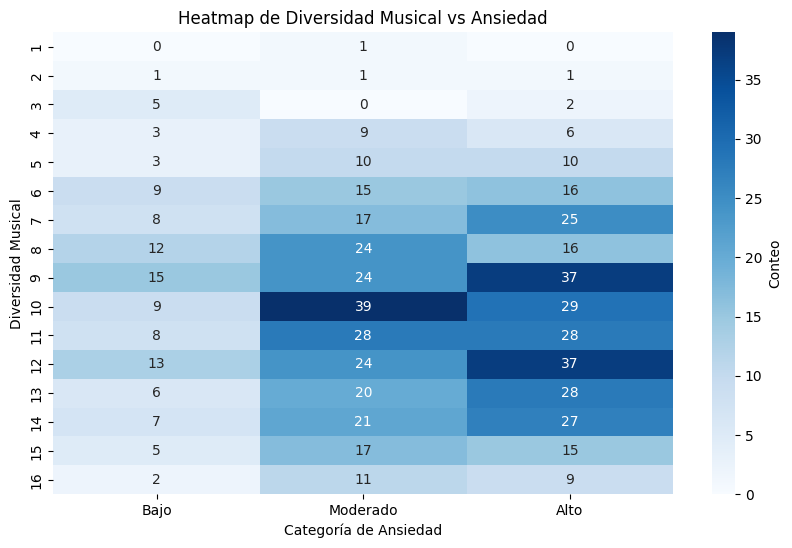

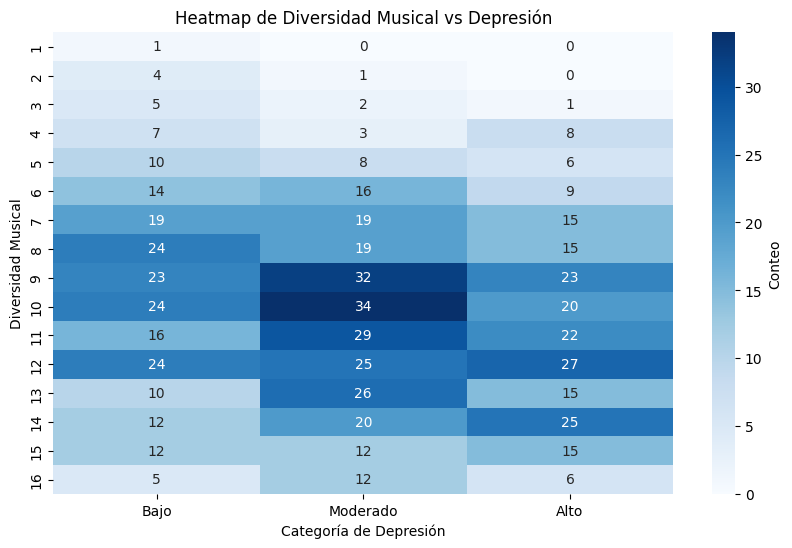

In [31]:
# Se crea tablas de contingencia para Anxiety y Depression
contingency_anxiety = pd.crosstab(df['Musical Diversity'], df_clean['Anxiety_cat'])
contingency_depression = pd.crosstab(df['Musical Diversity'], df_clean['Depression_cat'])

# Heatmap para Anxiety
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_anxiety, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Conteo'})
plt.title('Heatmap de Diversidad Musical vs Ansiedad')
plt.xlabel('Categoría de Ansiedad')
plt.ylabel('Diversidad Musical')
plt.show()

# Heatmap para Depression
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_depression, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Conteo'})
plt.title('Heatmap de Diversidad Musical vs Depresión')
plt.xlabel('Categoría de Depresión')
plt.ylabel('Diversidad Musical')
plt.show()

In [33]:
# Prueba Chi-cuadrado para Anxiety
chi2_anxiety, p_anxiety, dof_anxiety, expected_anxiety = chi2_contingency(contingency_anxiety)

# Prueba Chi-cuadrado para Depression
chi2_depression, p_depression, dof_depression, expected_depression = chi2_contingency(contingency_depression)

print(f"Chi-cuadrado para Anxiety: {chi2_anxiety}, p-value: {p_anxiety}, Grados de libertad: {dof_anxiety}")
print("Frecuencias esperadas para Anxiety:")
print(expected_anxiety)

print(f"\nChi-cuadrado para Depression: {chi2_depression}, p-value: {p_depression}, Grados de libertad: {dof_depression}")
print("Frecuencias esperadas para Depression:")
print(expected_depression)

Chi-cuadrado para Anxiety: 38.84214244100535, p-value: 0.12930466472497834, Grados de libertad: 30
Frecuencias esperadas para Anxiety:
[[ 0.16232772  0.39969372  0.43797856]
 [ 0.48698315  1.19908116  1.31393568]
 [ 1.13629403  2.79785605  3.06584992]
 [ 2.92189893  7.19448698  7.88361409]
 [ 3.73353752  9.19295559 10.07350689]
 [ 6.49310873 15.98774885 17.51914242]
 [ 8.11638591 19.98468606 21.89892802]
 [ 8.44104135 20.78407351 22.77488515]
 [12.33690658 30.37672282 33.2863706 ]
 [12.4992343  30.77641654 33.72434916]
 [10.38897397 25.58039816 28.03062787]
 [12.01225115 29.57733538 32.41041348]
 [ 8.76569678 21.58346095 23.65084227]
 [ 8.9280245  21.98315467 24.08882083]
 [ 6.00612557 14.78866769 16.20520674]
 [ 3.5712098   8.79326187  9.63552833]]

Chi-cuadrado para Depression: 38.45846896244223, p-value: 0.1383299909870637, Grados de libertad: 30
Frecuencias esperadas para Depression:
[[ 0.31111111  0.38222222  0.30666667]
 [ 1.55555556  1.91111111  1.53333333]
 [ 2.48888889  3.0577

La hipótesis que sugiere que la diversidad musical tiene un impacto en los niveles de ansiedad y depresión no se sostiene con los datos recolectados. A pesar de que se esperaban diferencias en los niveles de ansiedad y depresión en función de la diversidad musical, los análisis estadísticos indican que estas diferencias no son significativas. Esto sugiere que la diversidad musical no es un factor determinante en la variabilidad de la ansiedad y depresión dentro de esta muestra.